<a href="https://colab.research.google.com/github/DazhiZhong/Pixray_Notebooks/blob/main/pixray_model_demonstration_sm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Made by [@dazhizhong](https://twitter.com/DazhiZhong), also find me on [Github](https://github.com/DazhiZhong)

In [ ]:
#@title connect to drive

import os
import sys
from google.colab import drive
abs_root_path = "/content"
drive.mount('/content/drive')
folder_name = "py_testing" #@param {type: "string"}

if len(folder_name) > 0:
    path_tmp = abs_root_path + "/drive/MyDrive/" + folder_name
    if not os.path.exists(path_tmp):
        os.mkdir(path_tmp)
    abs_root_path = path_tmp

print("Created folder & set root path to: " + abs_root_path)
# os.chdir(abs_root_path)

%cd {abs_root_path}


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Created folder & set root path to: /content/drive/MyDrive/py_testing
/content/drive/MyDrive/py_testing


In [ ]:
#@title setup - run and restart runtime
# gpu check
nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  print(f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, some things might not work <--")
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

# install
print("Installing...")
from IPython.utils import io
with io.capture_output() as captured:
  !rm -Rf pixray
  !git clone https://github.com/pixray/pixray
  !pip install -r pixray/requirements.txt
  !pip uninstall -y tensorflow 
  !git clone https://github.com/pixray/diffvg
  %cd diffvg
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  !pip freeze | grep torch

# remind restart runtime
import os
if not os.path.isfile("/content/first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("/content/first_init_complete")
  print("Please choose Runtime -> Restart Runtime from the menu")
  print("(then continue below)")
else:
  print("Setup Complete! Good luck with your drawing")


GPU check: 16280 MiB available: this should be fine
Installing...
Setup Complete! Good luck with your drawing


In [ ]:
import sys
sys.path.append("pixray")
# Simple setup
import pixray
import importlib
importlib.reload(pixray)
import json
import os
import shutil

testing_models = ["coco","wikiart_16384","imagenet_f16_16384"]


consistent_settings = {
    "drawer": "vqgan",
    "quality": "better",
    "aspect": "square",
    "display_every": 50,
    "iterations": 200,
    "seed": 42, #answer to the universe 
    "cudnn_determinism": True,
}

#@markdown change the testing prompts
# change these !!!
testing_prompts = [
    #face
    "the angry face of a Japanese warrior",
    #landscape
    "the scottish highlands at golden hour",
    #art
    "a reinaissance painting of philosophers debating",
    #birds
    "a round grey feathered red headed woodpacker on a branch",
    #abstract
    "The experience and state of being as an entity existing",
    #style
    "waves in the style of ukiyo-e woodblock paints",
]

for save_model_dir in testing_models:
    !rm -rf {save_model_dir}/
    os.mkdir(save_model_dir)
        
try:
    for i, prompt in enumerate(testing_prompts):
        for model_num, model in enumerate(testing_models):
            cur_set = consistent_settings.copy()
            new_settings = {
                "vqgan_model": model,
                "output": f"{model}/out_{i}.png",
                "prompts": prompt
            }
            cur_set.update(new_settings)
            pixray.reset_settings()
            pixray.add_settings(**cur_set)
            settings = pixray.apply_settings()
            pixray.do_init(settings)
            pixray.do_run(settings)
except KeyboardInterrupt:
    pass
        


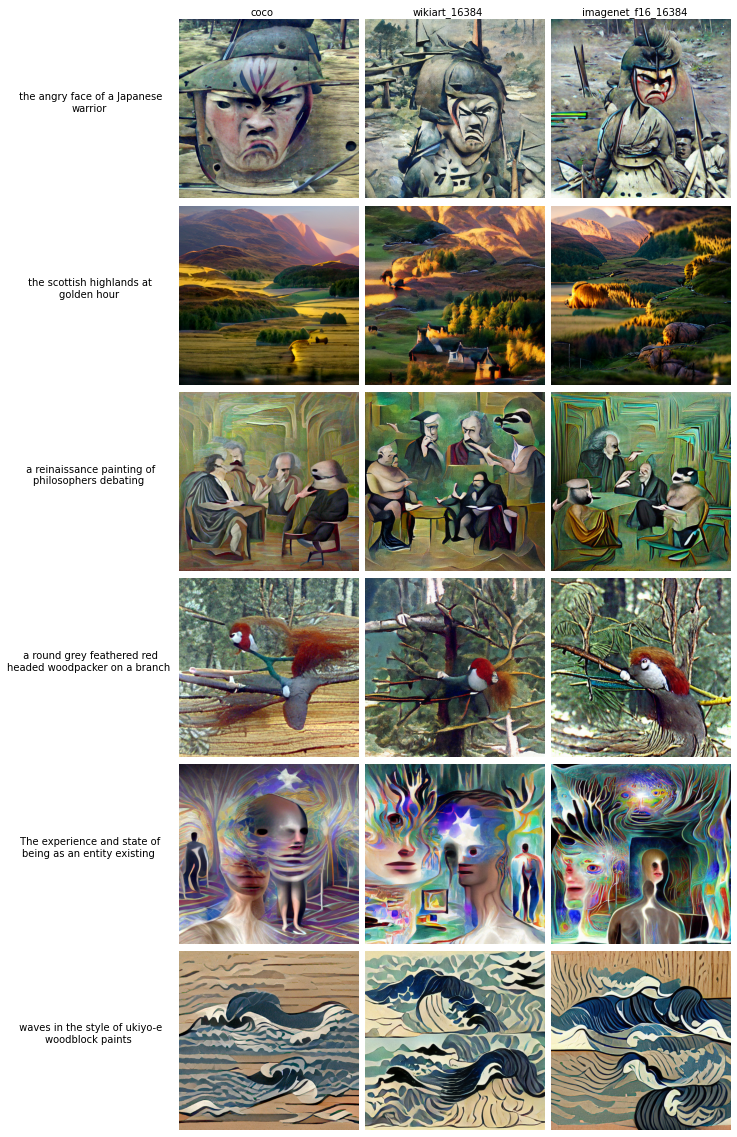

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from PIL import Image


tempim = Image.new(mode="RGB", size=(200, 200),color = (255, 255, 255))
num_models = len(testing_models)
num_prompts = len(testing_prompts)
size = [1.0+3.5*num_models,1.0+3.5*num_prompts]
# size=(10,10)
fig = plt.figure(figsize=size)
fig.set_facecolor("w")

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(num_prompts+1, num_models+1),  
                 axes_pad=0.1,  # pad between axes in inch.
                 )



grid[0].axis("off")
for m_num, model in enumerate(testing_models):
    grid[m_num+1].text(200,0,model,va="center",ha="center")
    grid[m_num+1].axis("off")

for p_num, prompt in enumerate(testing_prompts):
    ax = grid[(p_num+1)*(num_models+1)]
    ax.imshow(tempim )
    words = prompt.split(" ")
    wls = [len(i) for i in words]
    total = ""
    running_sum = 0
    for w,wl in zip(words, wls):
        if running_sum + wl > 25:
            total+="\n"+w
            running_sum = wl
        else:
            total+=" "+w
            running_sum += wl
    ax.text(0, 200, total,wrap=True,va="center",ha="center")
    ax.axis("off")
    for m_num, model in enumerate(testing_models):
        ax = grid[(p_num+1)*(num_models+1)+m_num+1]
        ax.axis("off")
        try:
            im = Image.open(f"{model}/out_{p_num}.png")
            ax.imshow(im)
        except:
            pass

plt.show()

In [ ]:
#@title download all
!rm -rf images.zip
for m in testing_models:
    !zip -r images.zip {m}/
from google.colab import files
files.download('images.zip') 

  adding: coco/ (stored 0%)
  adding: coco/out_0.png (deflated 0%)
  adding: coco/out_1.png (deflated 0%)
  adding: coco/out_2.png (deflated 0%)
  adding: coco/out_3.png (deflated 0%)
  adding: coco/out_4.png (deflated 0%)
  adding: coco/out_5.png (deflated 0%)
  adding: wikiart_16384/ (stored 0%)
  adding: wikiart_16384/out_0.png (deflated 0%)
  adding: wikiart_16384/out_1.png (deflated 0%)
  adding: wikiart_16384/out_2.png (deflated 0%)
  adding: wikiart_16384/out_3.png (deflated 0%)
  adding: wikiart_16384/out_4.png (deflated 0%)
  adding: wikiart_16384/out_5.png (deflated 0%)
  adding: imagenet_f16_16384/ (stored 0%)
  adding: imagenet_f16_16384/out_0.png (deflated 0%)
  adding: imagenet_f16_16384/out_1.png (deflated 0%)
  adding: imagenet_f16_16384/out_2.png (deflated 0%)
  adding: imagenet_f16_16384/out_3.png (deflated 0%)
  adding: imagenet_f16_16384/out_4.png (deflated 0%)
  adding: imagenet_f16_16384/out_5.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>